# Basics of Logistic Regression

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#load the data
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [4]:
y = data['Admitted']
x1 = data['SAT']

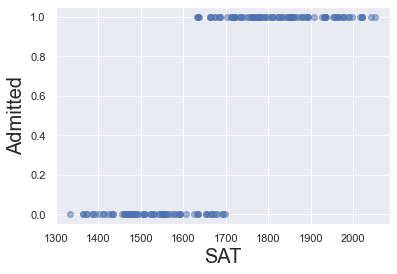

In [6]:
#create scatter plot
plt.scatter(x1,y,color='C0',alpha = 0.5)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


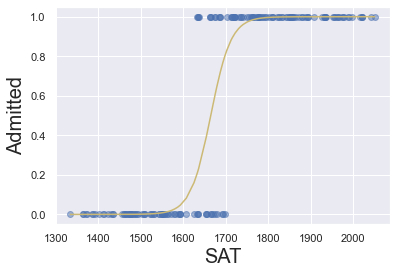

In [18]:
#plot with logistic regression curve
x=sm.add_constant(x1)
reg_log= sm.Logit(y,x)
results_log= reg_log.fit()


def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0', alpha=0.5)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

# Logistic Regression Assumptions

The logistic regression predicts the probability of an event occurring.
1. No endogeneity
2. Normality and homoscadasticity
3. No autocorrelation
4. No multicollinearity

logistic regression model:
P(x) = $\frac{e^(\beta0 +\beta1x1+...+\beta kxk)}{1+e^(\beta0+\beta1x1+...+\beta kxk)}$

After transformation, the equation turns into:

$\frac{p(X)}{1-p(X)} = e^(\beta0+\beta1xa+...+\beta kxk)$

The probability of an event occurring / the probability of an event not occurring = Odds.

Take the log of both sides and get Logit model:
log(odds) =$\beta0+\beta1x1+...+\beta kxk$

### simple logistic regression using statsmodel

In [19]:
#load the data
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [20]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [21]:
y = data['Admitted']
x1 = data['SAT']

In [22]:
x=sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [23]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 17 Nov 2022   Pseudo R-squ.:                  0.7992
Time:                        21:30:38   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Summary interpretation
* Method: MLE --> Maximum likelihood estimation: a function which estimates how likely it is that the model at hand describes the real underlying relationship of the variables. The bigger the likelihood fundtion, the higher the probability that our model is correct.

* Log-Likelihood: MLE tries to maximize the log likelihood. The value is almost but not always negative. The bigger the Log-likelihood is, the better.

* LL-Null (Log likelihood-null): The log-likelihood of a model which has no independent variables. (y = $\beta0$)
    Compare the log-likelihood of your model with the LL-null, to see if the model has any explanatory power.

* LLR p-value (log likelihood ratio p-value): measures if the model is statistically different from LL-null (a useless model)

* Pseudo R-squ. (Pseudo R-squared) = McFadden's R-squared: a good pseudo R-squared is between 0.2-0.4.
    Most useful for comparing variations of the same model. Different models will have completely different and incomparable Pseudo R-squares.


From the Summary table 2, coef of SAT = 0.042, coef of const = -69.9128, we can conclude that the log(odds) = -69.9128 + 0.042*SAT.


## Binary predictors in a logistic regression

In [24]:
raw_data = pd.read_csv('2.02. Binary predictors.csv')
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [25]:
#map the category variables into 0 and 1
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data['Gender'] = data['Gender'].map({'Female':1,'Male':0})
data

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


In [28]:
y = data['Admitted']
x1 = data[['SAT','Gender']]

In [29]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Fri, 18 Nov 2022   Pseudo R-squ.:                  0.8249
Time:                        14:26:16   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [30]:
#check the accuracy:
#format the predicted value
np.set_printoptions(formatter={'float':lambda x:'{0:0.2f}'.format(x)})
results_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [34]:
#compare the predicted value and the actual values (in statsmodel module) by creating a confusion matrix
results_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [35]:
#format the confusion matrix result
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


**calculate the accuracy, precision, sensitivity and specificity based on the case requirement**

* accuracy = (total true positive + total true negative)/ sample size = (69+90)/(69+90+4+5) = 94.6%

* precision = total true positive / (total true positive + total false positive)
    
    measures the accuracy of a predicted positive outcome
    
    
* sensitivity/recall = total true positive / (total true positive + total false negative)
    
    measures the strength of the model to predict a positive outcome--- the proportion of th 1s that it correctly identifies
    
    
* specificity = total true negative / (total true negative + total true false negative)
    
    measures a model's ability to predict a negative outcome


#### Underfitting & overfitting
Using training and test to check whether there's underfitting or overfitting

## Testing the model and assessing its accuracy

In [37]:
#this file is used to test the model we previously created
test = pd.read_csv('2.03. Test dataset.csv')
test

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male
5,1556,Yes,Female
6,1731,Yes,Female
7,1809,Yes,Female
8,1930,Yes,Female
9,1708,Yes,Male


In [38]:
#map the categorical variables
test['Admitted'] = test['Admitted'].map({'Yes':1,'No':0})
test['Gender'] = test['Gender'].map({'Female':1,'Male':0})
test

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0
5,1556,1,1
6,1731,1,1
7,1809,1,1
8,1930,1,1
9,1708,1,0


In [39]:
#make predictions based on the test data using the model created before 
#pay attention to the order of the variables feed into the model, it must be the same order as our trained data
test_actual = test['Admitted']
test_data = test.drop(['Admitted'], axis = 1)
test_data = sm.add_constant(test_data)
test_data

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


In [40]:
def confusion_matrix(data, actual_values, model):
    pred_values = model.predict(data)
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm, accuracy

In [41]:
#create a confusion matrix
cm = confusion_matrix(test_data, test_actual, results_log)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]),
 0.8947368421052632)

The accuracy = 0.8947